<a href="https://colab.research.google.com/github/oxseba/PI_ML_OPS/blob/main/ProyInd1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
%cd /content/drive/MyDrive/ProyInd1/ArchivosOriginales

Mounted at /content/drive
/content/drive/MyDrive/ProyInd1/ArchivosOriginales


In [36]:
import zipfile, gzip, json, ast, nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
%matplotlib inline
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy
from sklearn import preprocessing

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
df=pd.read_csv('movies_dataset.csv')
df.head(2)

<ipython-input-10-a5510dd6b0be>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('movies_dataset.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [11]:
df.shape

(45466, 24)

In [12]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [13]:
# Los valores nulos de los campos revenue, budget son rellenados por el número 0

df['revenue'].fillna(0, inplace=True)
df['budget'].fillna(0, inplace=True)
print('Nulos en revenue',df.revenue.isna().sum())
print('Nulos en budget',df.revenue.isna().sum())

Nulos en revenue 0
Nulos en budget 0


In [14]:
# Borramos valores nulos
df = df.dropna(subset = ['release_date'])
df.release_date.isna().sum()

0

In [15]:
# Transformamos el formato de fecha de 'release_date' a 'aaaa-mm-dd' si el formato es incorrecto
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.strftime('%Y-%m-%d')

In [16]:
# Creamos la columna 'release_year' extrayendo el año de 'release_date'
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['release_year'] = df['release_year'].astype('Int64')

In [17]:
df[['release_date','release_year']]

,release_date,release_year
0,1995-10-30,1995
1,1995-12-15,1995
2,1995-12-22,1995
3,1995-12-22,1995
4,1995-02-10,1995
...,...,...
45460,1991-05-13,1991
45462,2011-11-17,2011
45463,2003-08-01,2003
45464,1917-10-21,1917


In [18]:
df.release_year.unique()

<IntegerArray>
[1995, 1996, 1994, 1997, 1976, 1992, 1967, 1993, 1964, 1977,
 ...
 1908, 1897, 1887, 1888, 1890, 1878, 1874, 1906, 1883, 1907]
Length: 136, dtype: Int64

In [19]:
# Borramos valores nulos nuevamente
df = df.dropna(subset = ['release_date'])
df.release_date.isna().sum()

0

In [20]:
# Borramos valores nulos nuevamente
df = df.dropna(subset = ['release_year'])
df.release_date.isna().sum()


0

In [21]:
df.isna().sum()

adult                        0
belongs_to_collection    40888
budget                       0
genres                       0
homepage                 37610
id                           0
imdb_id                     14
original_language           11
original_title               0
overview                   941
popularity                   0
poster_path                339
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
video                        0
vote_average                 0
vote_count                   0
release_year                 0
dtype: int64

In [22]:
df.shape

(45376, 25)

In [23]:
# Creamos la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget,
# cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0

# Calculamos el retorno de inversión

# Convertimos 'revenue' y 'budget' al tipo numérico (float)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Calculamos el retorno de inversión
df['return'] = df['revenue'] / df['budget']
df['return'].fillna(0, inplace=True)
df['return']

0        12.451801
1         4.043035
2         0.000000
3         5.090760
4              inf
           ...    
45460     0.000000
45462     0.000000
45463     0.000000
45464     0.000000
45465     0.000000
Name: return, Length: 45376, dtype: float64

In [24]:
df['return'].isna().sum()

0

In [25]:
df['return'].unique()

array([12.4518011,  4.0430346,  0.       , ...,  1.660765 ,  0.6343965,
        0.2826   ])

In [26]:
df.shape

(45376, 26)

In [27]:
# Eliminamos las columnas que no serán utilizadas, video,imdb_id,adult,original_title,vote_count,poster_path y homepage
df.drop(columns=['video', 'imdb_id', 'adult', 'original_title', 'vote_count', 'poster_path', 'homepage'], inplace = True)
df.columns


Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'release_year', 'return'],
      dtype='object')

In [28]:
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,1995,12.451801
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.000000
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,1995,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,1995,inf


In [29]:
print(df.info())  # Información general del dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45376 non-null  int64  
 2   genres                 45376 non-null  object 
 3   id                     45376 non-null  object 
 4   original_language      45365 non-null  object 
 5   overview               44435 non-null  object 
 6   popularity             45376 non-null  object 
 7   production_companies   45376 non-null  object 
 8   production_countries   45376 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45376 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       45376 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

In [30]:
# Convertimos la columna 'popularity' a tipo numérico
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

# Verificamos el tipo de datos después de la conversión
print(df['popularity'].dtype)

float64


In [31]:
print(df.isnull().sum())  # Contamos los valores nulos en cada columna.

# Tagline tiene junto con belongs_to_collection la mayor cantidad de nulos y por ende no serían muy útiles para un modelo de recomendación.

belongs_to_collection    40888
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24978
title                        0
vote_average                 0
release_year                 0
return                       0
dtype: int64


In [33]:
df.describe()  # Estadísticas descriptivas de las variables numéricas


,budget,popularity,revenue,runtime,vote_average,release_year,return
count,4.537600e+04,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.0,45376.0
mean,4.232604e+06,2.926458,1.123010e+07,94.181675,5.624070,1991.881193,inf
std,1.743986e+07,6.009672,6.438996e+07,38.341059,1.915423,24.05536,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1874.0,0.0
25%,0.000000e+00,0.388840,0.000000e+00,85.000000,5.000000,1978.0,0.0
50%,0.000000e+00,1.130454,0.000000e+00,95.000000,6.000000,2001.0,0.0
75%,0.000000e+00,3.691695,0.000000e+00,107.000000,6.800000,2010.0,0.0
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,2020.0,inf


In [ ]:
# Las columnas con datos menos desviados son vote_average y budget

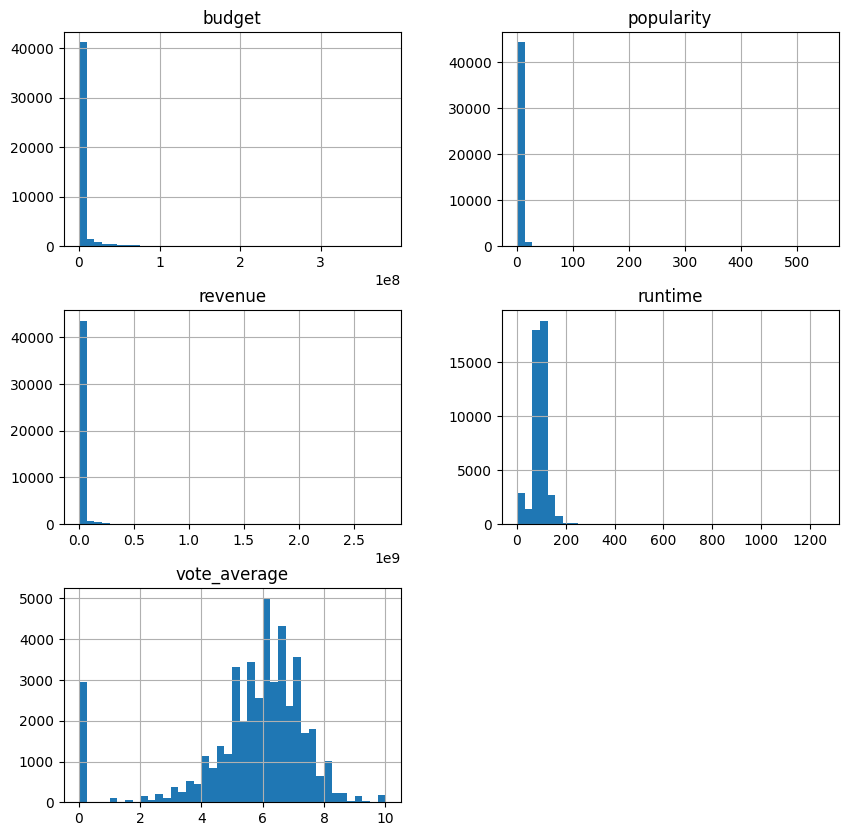

In [34]:
columnas = ['budget', 'popularity',	'revenue', 'runtime', 'vote_average']
df[columnas].hist(bins=40, figsize= (10, 10))
plt.show()

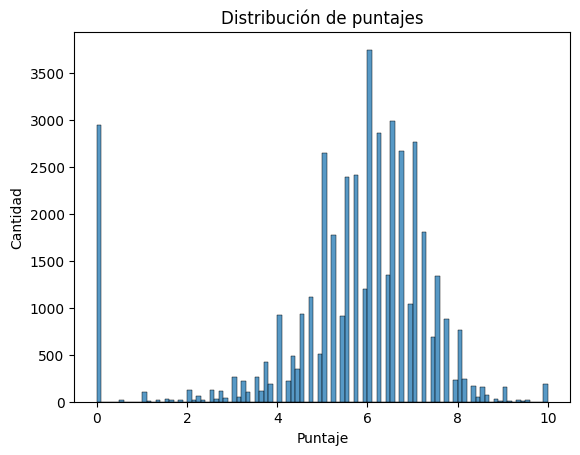

In [37]:
# Puntajes
sns.histplot(df['vote_average'])
plt.xlabel('Puntaje')
plt.ylabel('Cantidad')
plt.title('Distribución de puntajes')
plt.show()

In [ ]:
# Los puntajes (vote_average) de las películas siguen aproximadamente una distribución normal. El resto de las distribuciones presentan un gran sesgo a la derecha

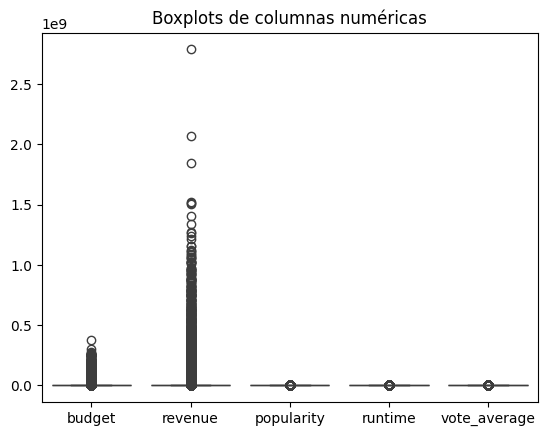

In [39]:
# Outliers

sns.boxplot(data=df[['budget', 'revenue', 'popularity', 'runtime', 'vote_average']])
plt.title('Boxplots de columnas numéricas')
plt.show()

In [ ]:
# Se observan muchos outliers en presupuesto (budget) y ganancia (revenue). Evaluaremos la conveniencia de su filtrado para nuestro modelo de recomendación.

<ipython-input-40-d41c670d8d84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


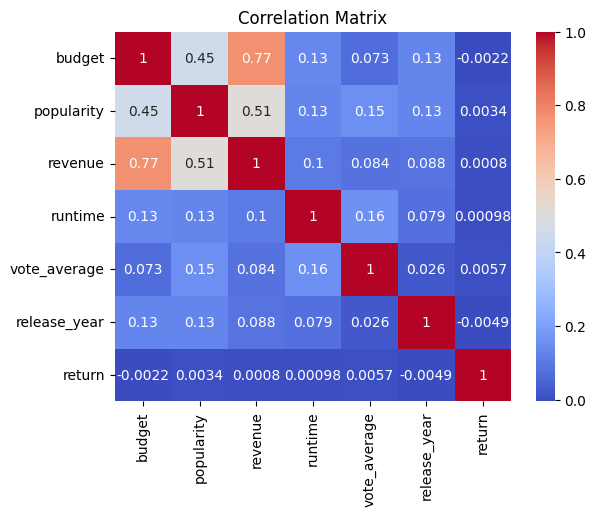

In [40]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Se visualiza una relación positiva entre la popularidad de la película y las ganancias como así también entre la popularidad y el presupuesto.
# También se observa una relación positiva entre presupuesto y ganancias pero su alto valor nos indica que se trata de una redundancia.
# No existe una correlación alta entre popularidad y puntaje

In [ ]:
# Son las películas populares las más rentables?

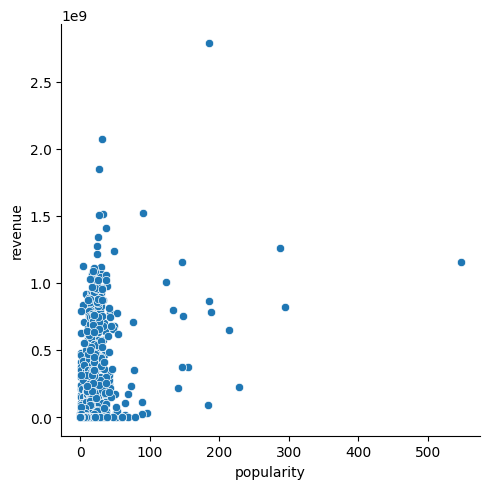

In [41]:
sns.relplot(x='popularity',y='revenue', data=df)


In [ ]:
# No podemos afirmar que exista dicha relación
# Las películas con inversion mayor son las que resultan más populares?

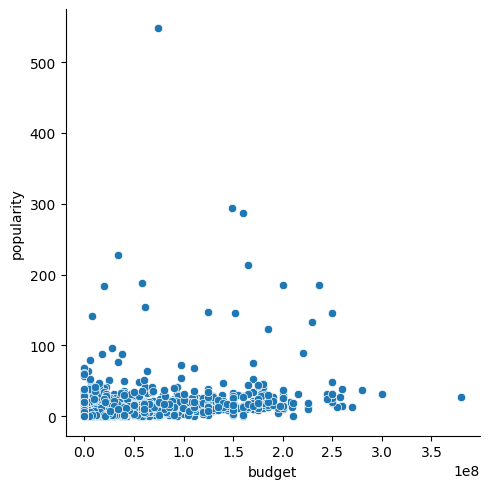

In [42]:
sns.relplot(x='budget',y='popularity', data=df)

In [ ]:
# No podemos afirmar que exista dicha relación

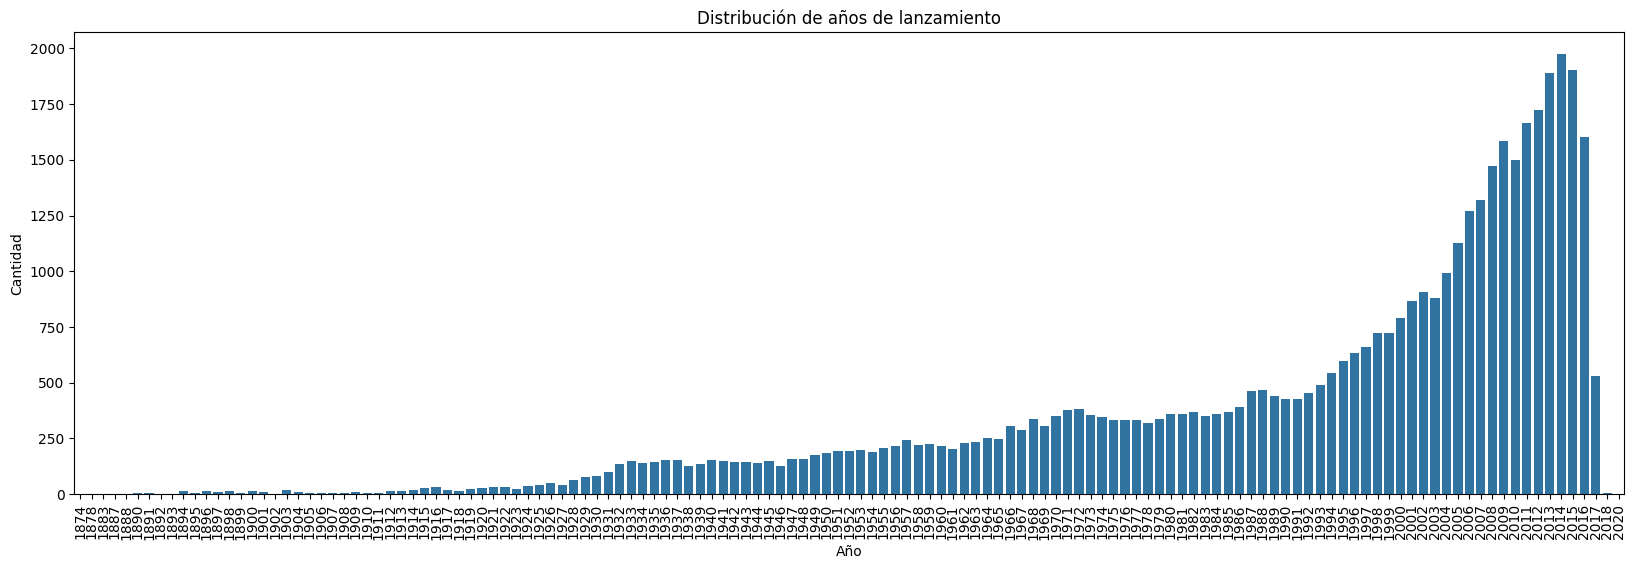

In [43]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='release_year')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Distribución de años de lanzamiento')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Vemos como el número de películas por año aumentó con el paso del tiempo. Es a partir de 1990 que se observa un crecimiento exponencial en la cantidad de películas por año.

In [44]:
import ast
# Convertimos la columna 'genres' de string a lista de diccionarios
df['genres'] = df['genres'].apply(ast.literal_eval)
# Extraemos el nombre de cada genero y cramos una nueva columna con la lista de nombres de generos
df['genre_names'] = df['genres'].apply(lambda x: [d['name'] for d in x])
# Expandimos la lista de nombres de géneros
generos_expandidos = df['genre_names'].explode()
# Contamos la frecuencia de cada valor en la columna 'genre_names'
conteo_generos = generos_expandidos.value_counts()
# Eliminamos los géneros que solo aparecen una vez
conteo_generos = conteo_generos[conteo_generos > 1]

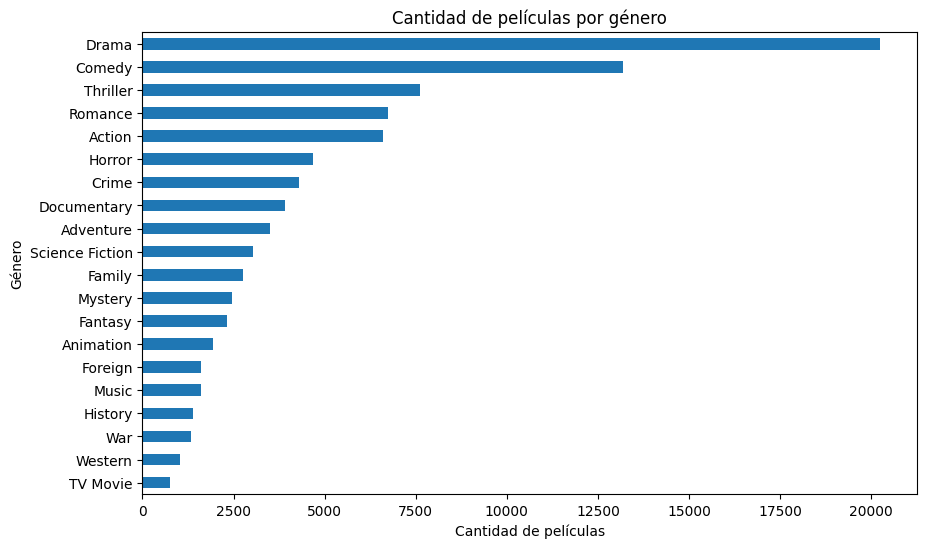

In [45]:
# Grafico para ver la cantidad de peliculas por genero
conteo_generos = conteo_generos.sort_values()  # Ordenamos los géneros por cantidad de películas

plt.figure(figsize=(10,6))
conteo_generos.plot(kind='barh')
plt.title('Cantidad de películas por género')
plt.xlabel('Cantidad de películas')
plt.ylabel('Género')
plt.show()

In [46]:
# Observamos que hay mayor cantidad de películas para la categoría Drama. Luego podemos observar una gran cantidad para el género Comedia, Thriller, Romance y Acción

In [ ]:
# Intentaremos llevar a cabo un modelo de recomendación de películas basado en Machine Learning. En este caso utilizando la similitud del coseno
#pip install nltk

In [47]:
# Al observar que la cantidad de películas por año aumenta desde 1970, filtramos nuestro dataset para peliculas a partir de 1970
df = df[(df['release_year'] >= 1970)]

In [48]:
df.shape

(37087, 20)

In [49]:
# Primero trabajaremos sobre la columna 'overview' (descripción de la película)

# Convertimos todos los valores en la columna 'overview' a strings
df['overview'] = df['overview'].astype(str)


In [50]:
# Concatenamos todas las descripciones de las películas en una sola cadena de texto
# Utilizamos astype para asegurarnos de que todos los valores son cadenas de texto
text = ' '.join(df['overview'].astype(str))

In [51]:
# Eliminamos los duplicados basándonos en la columna 'title'
df = df.drop_duplicates(subset='title')

# Recreamos el índice de los títulos luego de eliminar los duplicados
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# Observamos las nuevas dimensiones
df.shape

(34969, 20)

In [52]:
# Volveremos a filtrar nuestro dataset de modo de poder quedarnos con las películas con mayor popularidad y puntaje
# De esta manera, el usuario del modelo tendrá una alta probabilidad de obtener recomendación para la película elegida

# Convertimos las columnas a float
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# Ordenamos por popularidad y tomamos las primeras 10000 filas
df_popular = df.sort_values(by='popularity', ascending=False).head(10000).reset_index(drop=True)

# Ordenamos por vote_average y tomamos las primeras 10000 filas
df_highly_rated = df.sort_values(by='vote_average', ascending=False).head(10000).reset_index(drop=True)

In [53]:
df_popular.shape

(10000, 20)

In [54]:
df_highly_rated.shape

(10000, 20)

In [ ]:
# Al tener una mejor distribución de los datos para los puntajes de las películas (vote_average) nos quedamos con el dataset filtrado por este criterio

In [55]:
# Exportamos el csv para poder ser consumido por la API

df_highly_rated.to_csv('movies_ml.csv', index=False)

In [ ]:
# Este código implementa un modelo de recomendación de películas basado en la similitud del coseno. La idea principal detrás de este modelo es
# encontrar películas similares basándose en la similitud de sus características,
# como el resumen, el género y las empresas productoras.

In [56]:
# Armamos el modelo de recomendación

# Importamos las librerías para calcular la similitud del coseno y para vectorizar el texto de las características.
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import HashingVectorizer

# Aseguramos que los datos de la columna 'overview' sean strings
df_highly_rated['overview'] = df_highly_rated['overview'].fillna('').astype('str')

# Aseguramos que los datos de la columna 'genres' sean strings
df_highly_rated['genres'] = df_highly_rated['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')

# Reemplazamos los valores NaN con cadenas vacías en la columna 'production_companies'
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].fillna('')

# Convertimos la columna 'production_companies' a string si es necesario
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Creamos una nueva columna combinando las características de interés
df_highly_rated['combined_features'] = df_highly_rated['overview'] + ' ' + df_highly_rated['genres'] + ' ' + df_highly_rated['production_companies']

# Convertimos todos los textos a minusculas para evitar duplicados
df_highly_rated['combined_features'] = df_highly_rated['combined_features'].str.lower()

# Inicializamos el HashingVectorizer para vectorizar el texto en una matriz de características. La dimensión de la matriz se establece en 2000.
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=2000)

# Transformamos los datos
hash_matrix = hash_vectorizer.fit_transform(df_highly_rated['combined_features'])

# Calculamos la similitud del coseno de la matriz de características usando la función cosine_similarity()
cosine_sim = cosine_similarity(hash_matrix)

# Creamos un índice de películas utilizando los títulos de las películas como clave y los índices como valores.
indices = pd.Series(df_highly_rated.index, index=df_highly_rated['title']).drop_duplicates()


In [57]:
# Definimos la función
# La función verifica si el título de la película proporcionada está presente en el conjunto de datos de muestra. Si no está presente, se devuelve un mensaje de error.
# Si está presente, se calcula la similitud del coseno de la película con todas las demás películas y se ordenan en función de sus puntuaciones de similitud.
# Se obtienen los índices de las 5 películas más similares y se devuelve una lista con sus títulos.

def recomendacion(titulo):
    '''Ingresas un nombre de pelicula y te recomienda 5 similares
    '''
    if titulo not in df_highly_rated['title'].values:
        return 'La película no se encuentra en el conjunto de datos de muestra.'
    else:
        # Obtenemos el índice de la película que coincide con el título
        idx = indices[titulo]

        # Obtenemos las puntuaciones de similitud de todas las películas con la puntuación de la película dada
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Ordenamos las películas en función de las puntuaciones de similitud
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Obtenemos las puntuaciones de las 5 películas más similares
        sim_scores = sim_scores[1:6]

        # Obtenemos los índices de las películas
        movie_indices = [i[0] for i in sim_scores]

        # Devolvemos las 5 películas más similares
        return {'lista recomendada': df_highly_rated['title'].iloc[movie_indices].tolist()}

In [59]:
print(recomendacion("Toy Story"))

{'lista recomendada': ['Toy Story 3', 'Toy Story 2', 'Small Fry', 'Hawaiian Vacation', 'Cheburashka']}


In [60]:
print(recomendacion("Jumanji"))

{'lista recomendada': ['Princes and Princesses', 'Stardust', 'The City of Lost Children', 'Charlie and the Chocolate Factory', 'The Science of Sleep']}


In [61]:
print(recomendacion("Avatar"))

{'lista recomendada': ['X-Men: First Class', 'Rise of the Planet of the Apes', 'X-Men: Days of Future Past', 'The Secret Life of Walter Mitty', 'Minority Report']}


In [62]:
print(recomendacion("Titanic"))

{'lista recomendada': ['Room', 'Cinderella Man', 'The Curious Case of Benjamin Button', 'The Maze Runner', 'Dancer in the Dark']}


In [63]:
print(recomendacion("Scarface"))

{'lista recomendada': ['Pusher', 'Desperado', 'Music Box', 'Maria Full of Grace', 'The Legend of Nigger Charley']}


Observamos que el modelo nos da recomendaciones interesantes para los ejemplos planteados.

In [ ]:
# Para esta segunda opción utilizaremos el algoritmo de K-Vecinos y partiremos del datadrame df_highly_rated
# Este modelo será el desplegado a través de render en el endpoint @app.get("/recomendacion/{titulo}")

In [66]:
# Volvemos a partir del archivo exportado previo al modelo anterior
df_highly_rated = pd.read_csv('movies_ml.csv')

In [67]:
# Este código construye un modelo de recomendación de películas basado en las características de las películas.

In [68]:
# Armamos el modelo de recomendación

# Importamos las bibliotecas de CountVectorizer y NearestNeighbors de la biblioteca de aprendizaje automático de Scikit-learn.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors

# Aseguramos que los datos de la columna 'overview' sean strings
df_highly_rated['overview'] = df_highly_rated['overview'].fillna('').astype('str')

# Aseguramos que los datos de la columna 'genres' sean strings
df_highly_rated['genres'] = df_highly_rated['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')

# Reemplazamos los valores NaN con cadenas vacías en la columna 'production_companies'
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].fillna('')

# Convertimos la columna 'production_companies' a string si es necesario
df_highly_rated['production_companies'] = df_highly_rated['production_companies'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Creamos una nueva columna combinando las características de interés
df_highly_rated['combined_features'] = df_highly_rated['overview'] + ' ' + df_highly_rated['genres'] + ' ' + df_highly_rated['production_companies']

# Convertimos todos los textos a minusculas para evitar duplicados
df_highly_rated['combined_features'] = df_highly_rated['combined_features'].str.lower()

#   Creamos una matriz de conteo usando CountVectorizer que convierte los textos en una matriz de frecuencias de palabras.
cv = CountVectorizer(stop_words='english', max_features=5000)
count_matrix = cv.fit_transform(df_highly_rated['combined_features'])

# Creamos un modelo para encontrar los vecinos mas cercanos en un espacio de caracteristicas
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(count_matrix)

# Creamos un indice de titulos de peliculas y eliminamos los duplicados
indices = pd.Series(df_highly_rated.index, index=df_highly_rated['title']).drop_duplicates()

In [69]:
# Definimos la función que tendrá el endpoint en la API y en Render
# La función toma el título de una película y devuelve una lista de las 5 películas más similares
def recomendacion(titulo):
    '''Ingresas un nombre de pelicula y te recomienda 5 similares
    '''
    # Verificamos si el titulo ingresado se encuentra en el df
    if titulo not in df_highly_rated['title'].values:
        return 'La pelicula no se encuentra en el conjunto de la base de datos.'
    else:
        # Obtenemos el índice de la película que coincide con el título
        index = indices[titulo]

        # Obtenemos las puntuaciones de similitud de las 5 peliculas más cercanas
        distances, indices_knn = nn.kneighbors(count_matrix[index], n_neighbors=6)

        # Obtenemos los indices de las peliculas
        movie_indices = indices_knn[0][1:]

        # Devolvemos las 5 peliculas mas similares
        return {'lista recomendada': df_highly_rated['title'].iloc[movie_indices].tolist()}

In [70]:
print(recomendacion("Toy Story"))

{'lista recomendada': ['Toy Story 3', 'Toy Story 2', 'Hawaiian Vacation', 'Lou', "A Bug's Life"]}


In [71]:
print(recomendacion("Jumanji"))

{'lista recomendada': ['Room', 'eXistenZ', 'Pokémon: The First Movie: Mewtwo Strikes Back', 'Manderlay', 'Enemy at the Gates']}


In [72]:
print(recomendacion("Avatar"))

{'lista recomendada': ['Rise of the Planet of the Apes', 'X-Men: First Class', 'I, Robot', 'The Maze Runner', 'Spy']}


In [73]:
print(recomendacion("Titanic"))

{'lista recomendada': ['Master and Commander: The Far Side of the World', 'Sparrows', 'The Poseidon Adventure', 'A Quiet Passion', 'Room']}


In [74]:
print(recomendacion("Scarface"))

{'lista recomendada': ['Pusher', "Freakin' Beautiful World", "Gridlock'd", 'How to Make Money Selling Drugs', 'Cocaine Cowboys: Reloaded']}


Observamos que este modelo, además de consumir menos procesamiento, nos resulta mas acertado a la hora de realizar las recomendaciones.